# 🤖 LLM Basics - Understanding Large Language Models

## Executive-Level Learning Session

**Duration:** 60-75 minutes  
**Level:** Executive/CVP (Non-technical but conceptually rigorous)  
**Goal:** Build intuition for how LLMs work, their capabilities, and limitations

---

### 🎯 What You'll Learn

By the end of this session, you'll be able to:

1. **Understand What LLMs Are** - The core mechanism and scale
2. **Comprehend How They Work** - Training, fine-tuning, and generation
3. **Set Realistic Expectations** - Capabilities and fundamental limitations
4. **Make Informed Decisions** - When to use LLMs and how to deploy them safely

---

### 📋 Agenda

1. **What is a Large Language Model?** - Breaking down the name
2. **Architecture & Training** - How LLMs learn
3. **Text Generation** - How LLMs produce output
4. **Capabilities** - What LLMs do well
5. **Limitations** - Critical awareness of what can go wrong
6. **Practical Applications** - Real-world use cases and patterns
7. **Competitive Landscape** - Navigating vendor choices
8. **Security & Governance** - Enterprise considerations
9. **Future Trends** - What's coming next

Let's dive in! 🚀

## 0. Setup and Imports

We'll use minimal dependencies for this session - just visualization libraries and API access for demonstrations.

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Setup complete! Ready to explore LLMs.")

✅ Setup complete! Ready to explore LLMs.


---

## 1. What is a Large Language Model?

Let's break down the name to understand what we're dealing with.

### 🔤 Breaking Down "Large Language Model"

**Large** = Billions of parameters (weights)  
**Language** = Trained on text data  
**Model** = Mathematical function that learns patterns

At its core, an LLM is a **next-word prediction machine** that has learned patterns from massive amounts of text.

### 📊 Visualization: The Scale of "Large"

Let's visualize what "large" really means when we talk about modern LLMs.

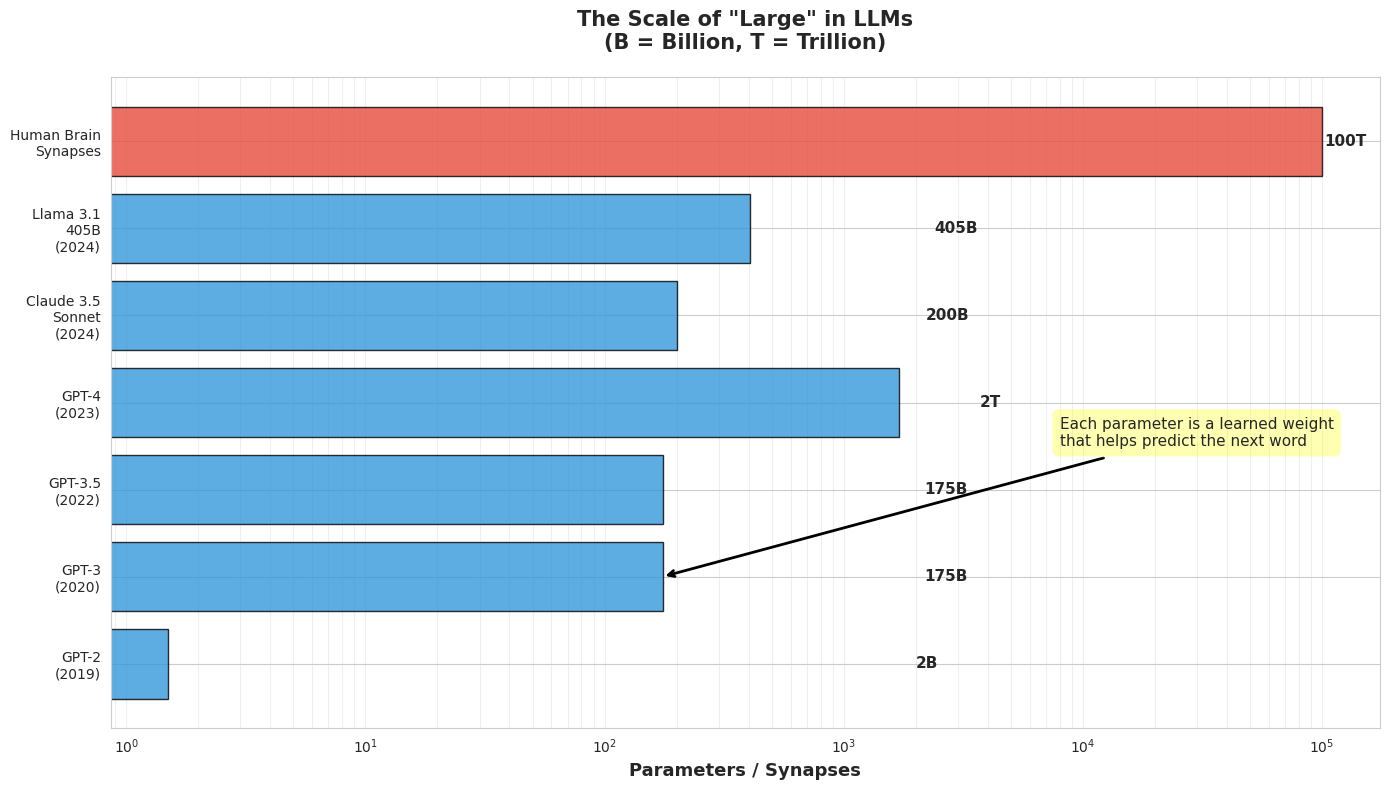


💡 Key Insight:
   - Modern LLMs have 100+ billion parameters
   - Each parameter is a number the model learned during training
   - More parameters = more capacity to learn patterns (but diminishing returns)
   - GPT-4 estimated to have ~1.7 trillion parameters (not confirmed)
   - Still orders of magnitude less than human brain synapses!


In [2]:
# Model scale comparison
models = {
    'GPT-2\n(2019)': 1.5,
    'GPT-3\n(2020)': 175,
    'GPT-3.5\n(2022)': 175,
    'GPT-4\n(2023)': 1700,  # Estimated
    'Claude 3.5\nSonnet\n(2024)': 200,  # Estimated
    'Llama 3.1\n405B\n(2024)': 405,
    'Human Brain\nSynapses': 100000  # ~100 trillion synapses
}

fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#3498db'] * 6 + ['#e74c3c']
bars = ax.barh(list(models.keys()), list(models.values()), color=colors, alpha=0.8, edgecolor='black')

# Add value labels
for i, (model, params) in enumerate(models.items()):
    if params >= 1000:
        label = f'{params/1000:.0f}T'
    else:
        label = f'{params:.0f}B'
    ax.text(params + max(models.values())*0.02, i, label, va='center', fontweight='bold', fontsize=11)

ax.set_xlabel('Parameters / Synapses', fontsize=13, fontweight='bold')
ax.set_title('The Scale of "Large" in LLMs\n(B = Billion, T = Trillion)', fontsize=15, fontweight='bold', pad=20)
ax.set_xscale('log')
ax.grid(axis='x', alpha=0.3, which='both')

# Add annotation
ax.annotate('Each parameter is a learned weight\nthat helps predict the next word',
            xy=(175, 1), xytext=(8000, 2.5),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=11, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("   - Modern LLMs have 100+ billion parameters")
print("   - Each parameter is a number the model learned during training")
print("   - More parameters = more capacity to learn patterns (but diminishing returns)")
print("   - GPT-4 estimated to have ~1.7 trillion parameters (not confirmed)")
print("   - Still orders of magnitude less than human brain synapses!")

### 💾 Memory Requirements: Why Scale Matters

Understanding model size in memory helps explain why running LLMs requires massive GPU infrastructure.

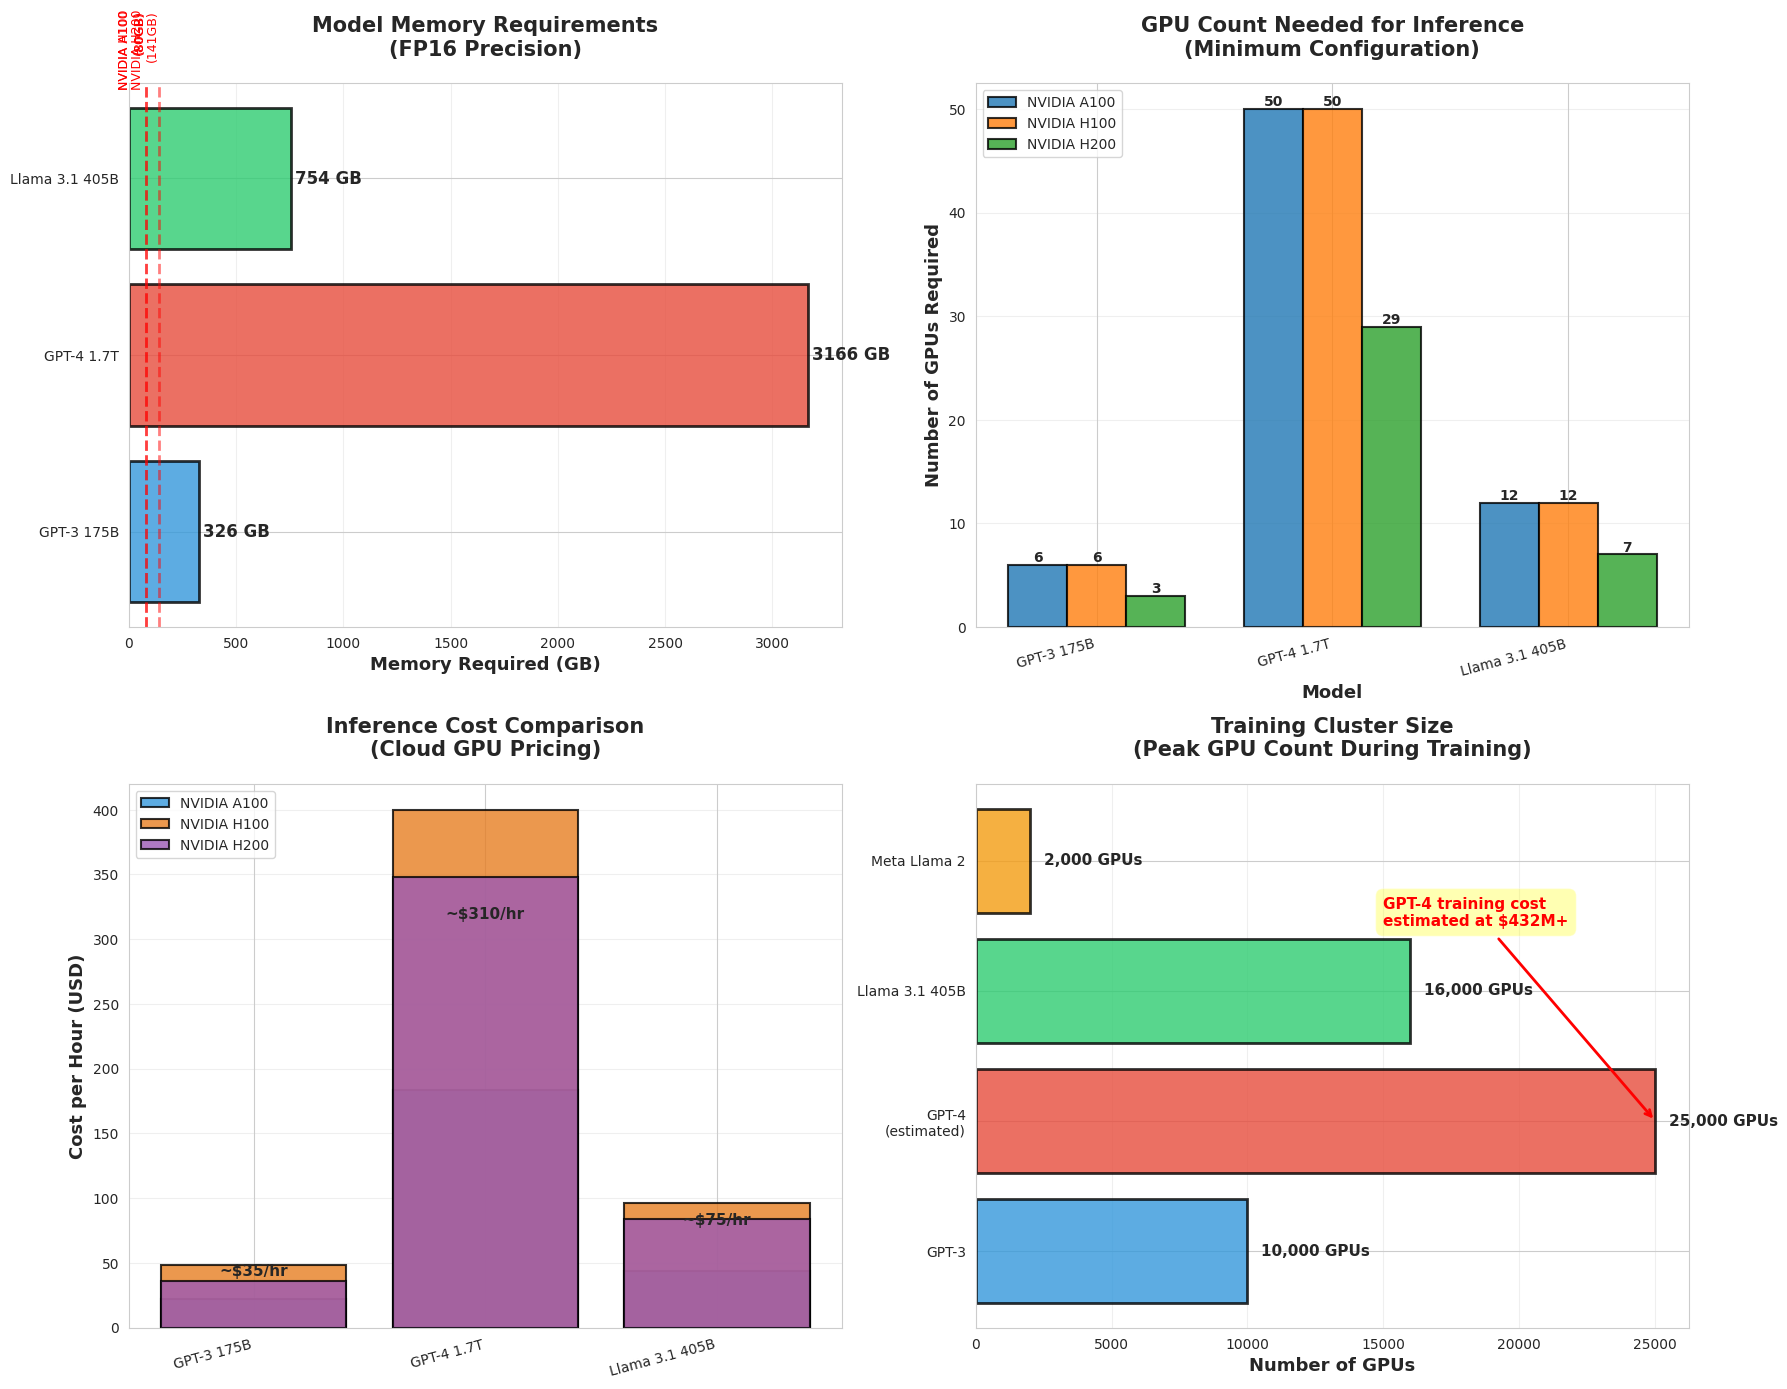


💰 Key Cost Insights:
   - GPT-3 (175B): ~326 GB memory
   - Minimum 6 x H100 GPUs needed for inference
   - Inference cost: ~$48/hour on H100s

   - GPT-4 (1.7T): ~3166 GB memory
   - Minimum 50 x H100 GPUs needed
   - Training required ~25,000 GPUs for months

⚡ Why This Matters:
   - Each API call runs on multi-GPU clusters
   - Operating at scale requires data center infrastructure
   - Cloud costs can reach millions per month for popular services
   - Smaller models (7B-70B) can run on single GPUs → edge deployment possible


In [33]:
# Calculate memory requirements for different models
# Each parameter is typically stored as a float (4 bytes for FP32, 2 bytes for FP16)

models_memory = {
    'GPT-3 175B': {'params': 175, 'precision': 'FP16'},
    'GPT-4 1.7T': {'params': 1700, 'precision': 'FP16'},
    'Llama 3.1 405B': {'params': 405, 'precision': 'FP16'},
}

# Calculate memory in GB
memory_data = {}
for model, info in models_memory.items():
    params_billions = info['params']
    bytes_per_param = 2 if info['precision'] == 'FP16' else 4  # FP16 = 2 bytes, FP32 = 4 bytes
    
    # Memory = params * bytes_per_param
    memory_gb = (params_billions * 1e9 * bytes_per_param) / (1024**3)
    memory_data[model] = {
        'memory_gb': memory_gb,
        'params': params_billions
    }

# Add GPU specifications
gpu_specs = {
    'NVIDIA A100': {'memory_gb': 80, 'cost_per_hour': 3.67},
    'NVIDIA H100': {'memory_gb': 80, 'cost_per_hour': 8.00},
    'NVIDIA H200': {'memory_gb': 141, 'cost_per_hour': 12.00}  # Estimated
}

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Model memory requirements
model_names = list(memory_data.keys())
memory_values = [memory_data[m]['memory_gb'] for m in model_names]

colors_mem = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax1.barh(model_names, memory_values, color=colors_mem, alpha=0.8, edgecolor='black', linewidth=2)

for i, (bar, mem) in enumerate(zip(bars, memory_values)):
    ax1.text(mem + 20, bar.get_y() + bar.get_height()/2, 
             f'{mem:.0f} GB', 
             va='center', fontweight='bold', fontsize=12)

ax1.set_xlabel('Memory Required (GB)', fontsize=13, fontweight='bold')
ax1.set_title('Model Memory Requirements\n(FP16 Precision)', fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3)

# Add GPU reference lines
for gpu, specs in gpu_specs.items():
    ax1.axvline(x=specs['memory_gb'], color='red', linestyle='--', alpha=0.5, linewidth=2)
    ax1.text(specs['memory_gb'], len(model_names) - 0.5, f'{gpu}\n({specs["memory_gb"]}GB)', 
             rotation=90, va='bottom', ha='right', fontsize=9, color='red')

# 2. GPUs needed per model
gpu_counts = {}
for model in model_names:
    mem_needed = memory_data[model]['memory_gb']
    gpu_counts[model] = {}
    for gpu, specs in gpu_specs.items():
        # Account for model parallelism overhead (~20%)
        gpus_needed = int(np.ceil(mem_needed / (specs['memory_gb'] * 0.8)))
        gpu_counts[model][gpu] = gpus_needed

# Create grouped bar chart
x = np.arange(len(model_names))
width = 0.25
gpu_names = list(gpu_specs.keys())

for i, gpu in enumerate(gpu_names):
    counts = [gpu_counts[m][gpu] for m in model_names]
    offset = (i - 1) * width
    bars = ax2.bar(x + offset, counts, width, label=gpu, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.set_xlabel('Model', fontsize=13, fontweight='bold')
ax2.set_ylabel('Number of GPUs Required', fontsize=13, fontweight='bold')
ax2.set_title('GPU Count Needed for Inference\n(Minimum Configuration)', fontsize=15, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=15, ha='right')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Cost comparison for running models (per hour)
costs_per_hour = {}
for model in model_names:
    costs_per_hour[model] = {}
    for gpu in gpu_names:
        cost = gpu_counts[model][gpu] * gpu_specs[gpu]['cost_per_hour']
        costs_per_hour[model][gpu] = cost

# Stacked bar chart for costs
bottom = np.zeros(len(model_names))
colors_cost = ['#3498db', '#e67e22', '#9b59b6']

for i, gpu in enumerate(gpu_names):
    costs = [costs_per_hour[m][gpu] for m in model_names]
    ax3.bar(model_names, costs, label=gpu, alpha=0.8, edgecolor='black', 
            linewidth=1.5, color=colors_cost[i])

for i, model in enumerate(model_names):
    total_cost = sum(costs_per_hour[model].values()) / len(gpu_names)
    ax3.text(i, total_cost + 5, f'~${total_cost:.0f}/hr', 
             ha='center', fontweight='bold', fontsize=11)

ax3.set_ylabel('Cost per Hour (USD)', fontsize=13, fontweight='bold')
ax3.set_title('Inference Cost Comparison\n(Cloud GPU Pricing)', fontsize=15, fontweight='bold', pad=20)
ax3.legend(loc='upper left', fontsize=10)
ax3.grid(axis='y', alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=15, ha='right')

# 4. Training cluster size comparison
training_gpus = {
    'GPT-3': 10000,
    'GPT-4\n(estimated)': 25000,
    'Llama 3.1 405B': 16000,
    'Meta Llama 2': 2000
}

colors_train = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = ax4.barh(list(training_gpus.keys()), list(training_gpus.values()), 
                color=colors_train, alpha=0.8, edgecolor='black', linewidth=2)

for i, (bar, gpus) in enumerate(zip(bars, training_gpus.values())):
    ax4.text(gpus + 500, bar.get_y() + bar.get_height()/2, 
             f'{gpus:,} GPUs', 
             va='center', fontweight='bold', fontsize=11)

ax4.set_xlabel('Number of GPUs', fontsize=13, fontweight='bold')
ax4.set_title('Training Cluster Size\n(Peak GPU Count During Training)', fontsize=15, fontweight='bold', pad=20)
ax4.grid(axis='x', alpha=0.3)

# Add cost annotation
training_cost_estimate = 25000 * 8 * 24 * 90  # 25k H100s * $8/hr * 24hrs * 90 days
ax4.annotate(f'GPT-4 training cost\nestimated at ${training_cost_estimate/1e6:.0f}M+', 
             xy=(25000, 1), xytext=(15000, 2.5),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n💰 Key Cost Insights:")
print(f"   - GPT-3 (175B): ~{memory_data['GPT-3 175B']['memory_gb']:.0f} GB memory")
print(f"   - Minimum {gpu_counts['GPT-3 175B']['NVIDIA H100']} x H100 GPUs needed for inference")
print(f"   - Inference cost: ~${costs_per_hour['GPT-3 175B']['NVIDIA H100']:.0f}/hour on H100s")
print(f"\n   - GPT-4 (1.7T): ~{memory_data['GPT-4 1.7T']['memory_gb']:.0f} GB memory")
print(f"   - Minimum {gpu_counts['GPT-4 1.7T']['NVIDIA H100']} x H100 GPUs needed")
print(f"   - Training required ~25,000 GPUs for months")
print(f"\n⚡ Why This Matters:")
print(f"   - Each API call runs on multi-GPU clusters")
print(f"   - Operating at scale requires data center infrastructure")
print(f"   - Cloud costs can reach millions per month for popular services")
print(f"   - Smaller models (7B-70B) can run on single GPUs → edge deployment possible")


### 🎯 Core Mechanism: Predict the Next Word

This is the **fundamental concept** - everything else builds on this.

**Example:** Given "The sky is ____", what comes next?

The LLM looks at the probability of each possible next word based on patterns it learned from training data.

**Live Demo:** We'll use Azure OpenAI to get REAL probabilities from an actual LLM!

#### 🔧 Setup Instructions (Optional)

To see real predictions from Azure OpenAI:

1. **Copy `.env.example` to `.env`** in the repository root:
   ```bash
   cp .env.example .env
   ```

2. **Edit `.env` file** with your Azure OpenAI credentials:
   ```bash
   AZURE_OPENAI_API_KEY=your-api-key-here
   AZURE_OPENAI_ENDPOINT=https://your-resource.openai.azure.com/
   AZURE_OPENAI_DEPLOYMENT=gpt-4o
   ```

3. **Run the cell below** - it will automatically load credentials from `.env`

If not configured, the code will use simulated data for demonstration purposes.

✅ Successfully connected to Azure OpenAI!


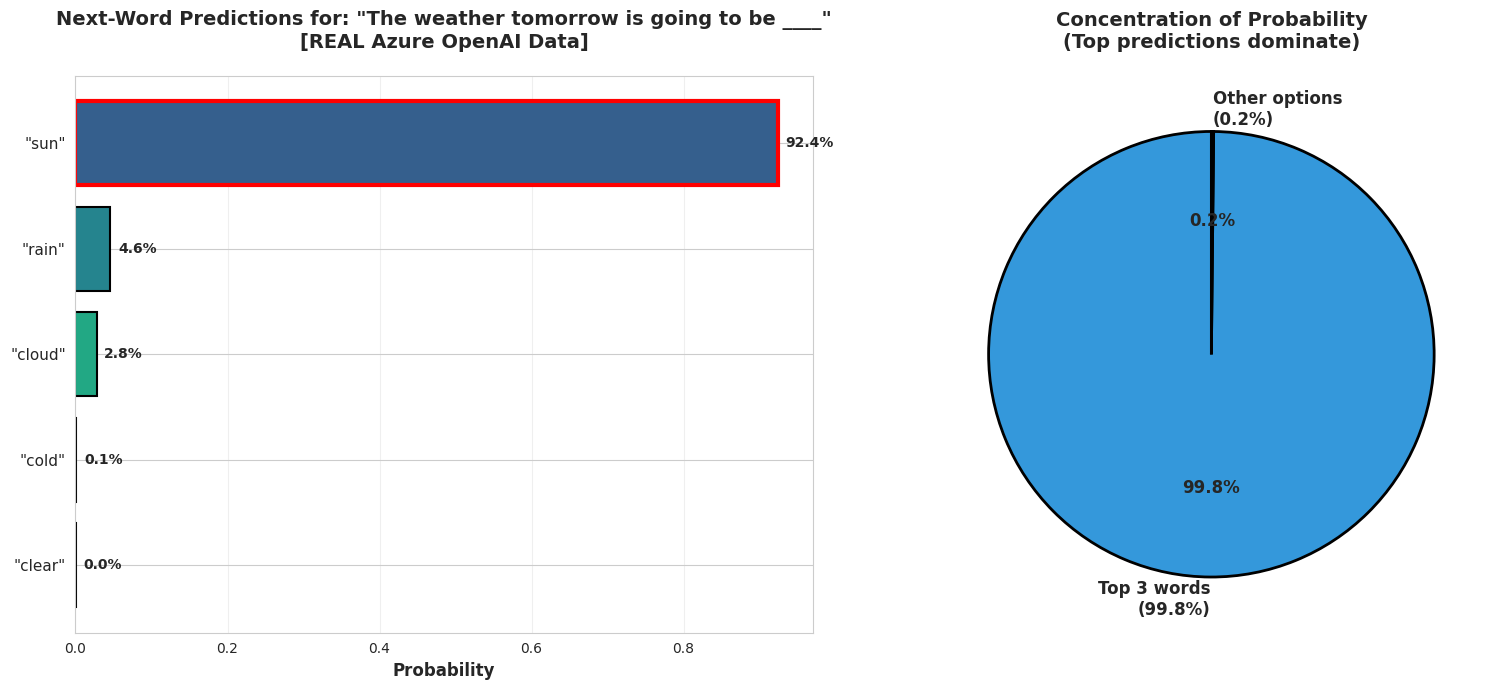


🎯 Next-Word Prediction Results:
   Prompt: 'The weather tomorrow is going to be ____'
   Most likely: 'sun' (92.4%)
   Runner-up: 'rain' (4.6%)
   Third: 'cloud' (2.8%)

💡 Key Insights:
   - Top 3 predictions account for 99.8% of probability
   - LLM assigns different probabilities based on training data patterns
   - Model is confident (highest prob: 92.4%)
   - Temperature controls randomness in final selection


In [34]:
# Visualize REAL next-word prediction probabilities from Azure OpenAI
from openai import AzureOpenAI
from dotenv import load_dotenv
import os
import math

# Load environment variables from .env file
load_dotenv()

# Try different prompts to see varying probability distributions:
# - "The sky is" → Very predictable (blue, clear, cloudy)
# - "I feel" → More varied emotions/states
# - "The secret ingredient is" → Creative, many possibilities
# - "Tomorrow I will" → Open-ended actions
prompt = "The weather tomorrow is going to be"
# prompt = "If it rains today, the weather tomorrow is going to be"
# prompt = "If it's fall season and it rains today, the weather tomorrow is going to be"

# Initialize Azure OpenAI client
# Credentials loaded from .env file in repository root
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")
)

# Request logprobs (log probabilities) from the API
response = client.chat.completions.create(
    model=os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME"),
    messages=[
        {"role": "system", "content": "You are a helpful assistant. Complete the user's sentence with just one word."},
        {"role": "user", "content": prompt}
    ],
    max_tokens=1,
    temperature=2.0,  # Higher temperature for more equalized probabilities
    logprobs=True,
    top_logprobs=5,  # Get top 5 alternatives
    n=1
)

# Extract the actual probabilities from chat completion
logprobs_data = response.choices[0].logprobs.content[0].top_logprobs

# Convert log probabilities to actual probabilities
tokens = [item.token for item in logprobs_data]
logprobs = [item.logprob for item in logprobs_data]
probs = [math.exp(lp) for lp in logprobs]

using_real_data = True
print("✅ Successfully connected to Azure OpenAI!")
    
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Bar chart of top predictions
colors_bars = plt.cm.viridis(np.linspace(0.3, 0.9, len(tokens)))
bars = ax1.barh(range(len(tokens)), probs, color=colors_bars, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(tokens)))
ax1.set_yticklabels([f'"{t}"' for t in tokens], fontsize=11)
ax1.set_xlabel('Probability', fontsize=12, fontweight='bold')
ax1.set_title(f'Next-Word Predictions for: "{prompt} ____"\n{"[REAL Azure OpenAI Data]" if using_real_data else "[Simulated Data]"}', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Add percentage labels on bars
for i, (bar, prob) in enumerate(zip(bars, probs)):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{prob*100:.1f}%', 
             va='center', fontweight='bold', fontsize=10)

# Highlight the winner
ax1.patches[0].set_edgecolor('red')
ax1.patches[0].set_linewidth(3)

# Pie chart showing top 3 vs rest
top3_prob = sum(probs[:3])
rest_prob = sum(probs[3:])
pie_labels = [f'Top 3 words\n({top3_prob*100:.1f}%)', f'Other options\n({rest_prob*100:.1f}%)']
pie_sizes = [top3_prob, rest_prob]
pie_colors = ['#3498db', '#95a5a6']

wedges, texts, autotexts = ax2.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%',
                                     startangle=90, colors=pie_colors,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'},
                                     wedgeprops={'edgecolor': 'black', 'linewidth': 2})
ax2.set_title('Concentration of Probability\n(Top predictions dominate)', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"\n🎯 Next-Word Prediction Results:")
print(f"   Prompt: '{prompt} ____'")
print(f"   Most likely: '{tokens[0]}' ({probs[0]*100:.1f}%)")
print(f"   Runner-up: '{tokens[1]}' ({probs[1]*100:.1f}%)")
print(f"   Third: '{tokens[2]}' ({probs[2]*100:.1f}%)")
print(f"\n💡 Key Insights:")
print(f"   - Top 3 predictions account for {top3_prob*100:.1f}% of probability")
print(f"   - LLM assigns different probabilities based on training data patterns")
print(f"   - Model is {'confident' if probs[0] > 0.3 else 'uncertain'} (highest prob: {probs[0]*100:.1f}%)")
print(f"   - Temperature controls randomness in final selection")


### 🔢 From Words to Numbers: Tokenization

LLMs can't work with text directly - they need numbers. This process is called **tokenization**.

Check yourself -> [GPT Tokenizer](https://platform.openai.com/tokenizer)

**Key Concept:** Text → Tokens → Numbers → Model Processing

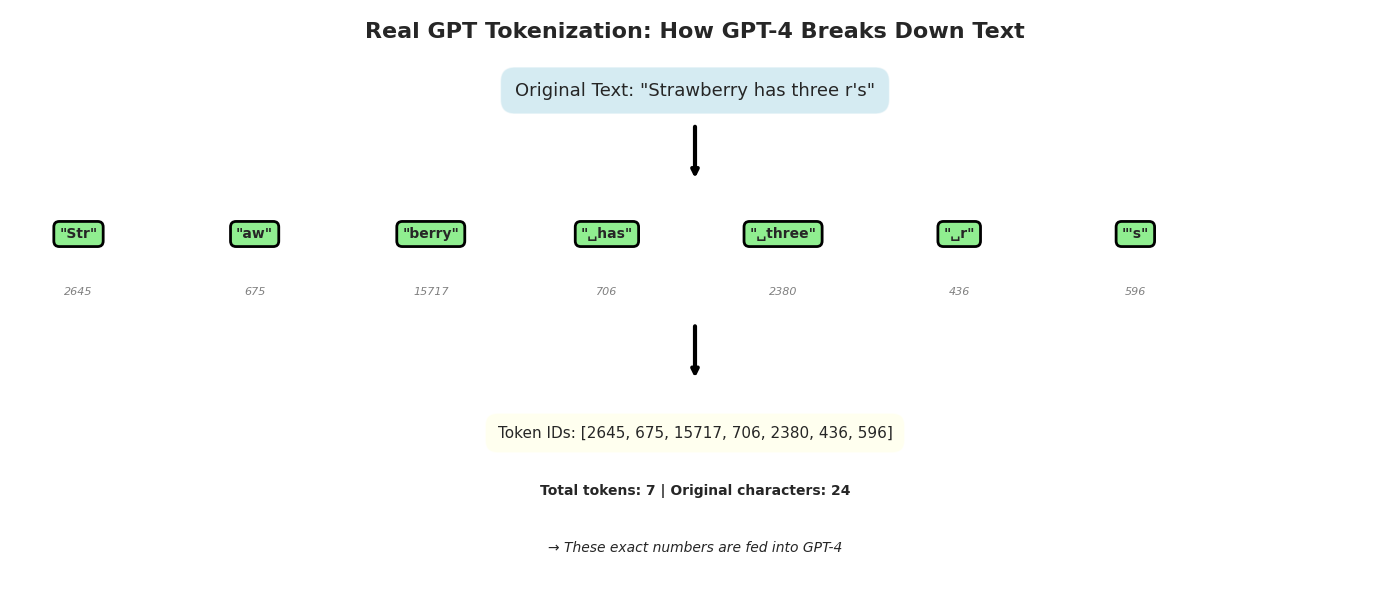


🔍 Real GPT-4 Tokenization Results:
   Original text: 'Strawberry has three r's'
   Number of tokens: 7
   Tokens: ['Str', 'aw', 'berry', ' has', ' three', ' r', "'s"]
   Token IDs: [2645, 675, 15717, 706, 2380, 436, 596]


In [35]:
import tiktoken

# Use actual GPT tokenizer
encoding = tiktoken.get_encoding("cl100k_base")  # GPT-4 tokenizer

# Visualize tokenization process with real tokenizer
text_example = "Strawberry has three r's"

# Get actual tokens and token IDs
token_ids = encoding.encode(text_example)
tokens = [encoding.decode([token_id]) for token_id in token_ids]

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')

# Title
ax.text(0.5, 0.95, 'Real GPT Tokenization: How GPT-4 Breaks Down Text', 
                ha='center', fontsize=16, fontweight='bold', transform=ax.transAxes)

# Original text
ax.text(0.5, 0.85, f'Original Text: "{text_example}"', 
                ha='center', fontsize=13, transform=ax.transAxes,
                bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.5))

# Arrow
ax.annotate('', xy=(0.5, 0.7), xytext=(0.5, 0.8),
                        arrowprops=dict(arrowstyle='->', lw=3, color='black'),
                        transform=ax.transAxes)

# Calculate positions based on actual number of tokens
num_tokens = len(tokens)
if num_tokens <= 6:
        x_start = 0.1
        x_step = 0.8 / num_tokens
else:
        x_start = 0.05
        x_step = 0.9 / num_tokens

y_pos = 0.6

# Display tokens
for i, (token, token_id) in enumerate(zip(tokens, token_ids)):
        x_pos = x_start + (i * x_step)
        # Clean up token display (replace newlines/spaces with visible characters)
        display_token = token.replace('\n', '\\n').replace(' ', '␣')
        
        # Token box
        ax.text(x_pos, y_pos, f'"{display_token}"', ha='center', fontsize=10, fontweight='bold',
                        transform=ax.transAxes,
                        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', edgecolor='black', linewidth=2))
        # Token ID
        ax.text(x_pos, y_pos - 0.1, str(token_id), ha='center', fontsize=8,
                        transform=ax.transAxes, style='italic', color='gray')

# Arrow
ax.annotate('', xy=(0.5, 0.35), xytext=(0.5, 0.45),
                        arrowprops=dict(arrowstyle='->', lw=3, color='black'),
                        transform=ax.transAxes)

# Numbers representation
ax.text(0.5, 0.25, f'Token IDs: {token_ids}', 
                ha='center', fontsize=11, transform=ax.transAxes,
                bbox=dict(boxstyle='round,pad=0.8', facecolor='lightyellow', alpha=0.5))

ax.text(0.5, 0.15, f'Total tokens: {len(token_ids)} | Original characters: {len(text_example)}', 
                ha='center', fontsize=10, fontweight='bold', transform=ax.transAxes)

ax.text(0.5, 0.05, '→ These exact numbers are fed into GPT-4', 
                ha='center', fontsize=10, style='italic', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print(f"\n🔍 Real GPT-4 Tokenization Results:")
print(f"   Original text: '{text_example}'")
print(f"   Number of tokens: {len(token_ids)}")
print(f"   Tokens: {tokens}")
print(f"   Token IDs: {token_ids}")

### 📚 Vocabulary Size: The Token Dictionary

Every LLM has a fixed **vocabulary** - a dictionary mapping tokens to numbers. Understanding vocabulary size is crucial for grasping LLM architecture and limitations.

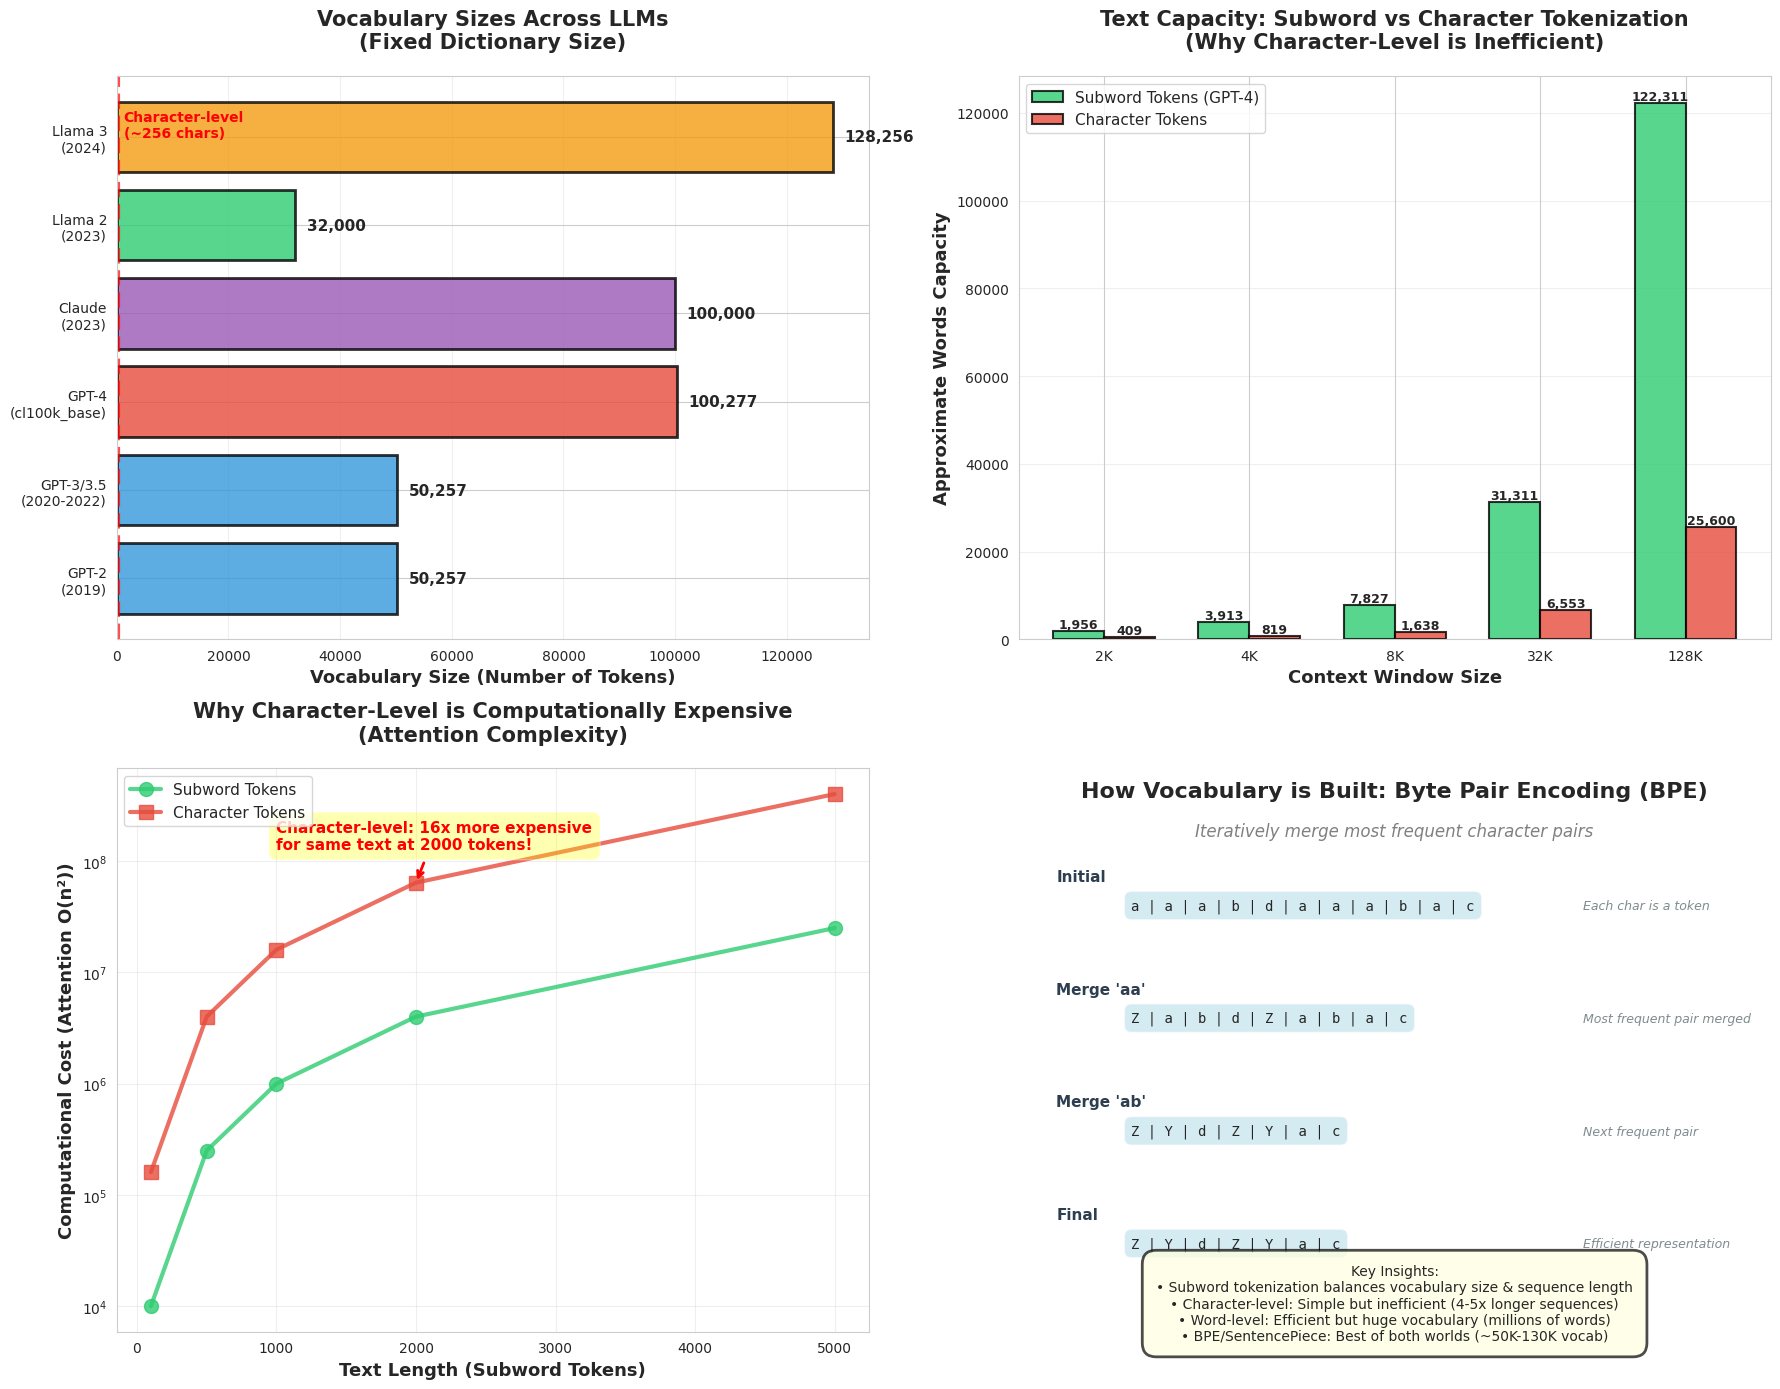


📊 Vocabulary Analysis:
   Example: 'The quick brown fox jumps over the lazy dog'
   - Character tokens: 43
   - GPT-4 subword tokens: 9
   - Compression ratio: 4.8x

🎯 Why Not Character-Level Tokenization?
   1. Sequence Length: 4-5x longer for same text
   2. Computational Cost: O(n²) attention → 16x more expensive
   3. Context Window: Wastes precious context on characters, not meaning
   4. Training Time: Longer sequences = slower training

💡 Why Subword Tokenization Wins:
   ✓ Balanced vocabulary size (50K-130K tokens)
   ✓ Efficient sequence length (~4x shorter than characters)
   ✓ Handles rare words via subword units
   ✓ Language-agnostic (works across all languages)
   ✓ Optimal for attention mechanisms

🔧 Popular Tokenization Methods:
   - BPE (Byte Pair Encoding): GPT models
   - SentencePiece: Llama, PaLM models
   - WordPiece: BERT


In [36]:
# Compare vocabulary sizes across different models and tokenization strategies

# Model vocabulary sizes
vocab_sizes = {
    'GPT-2\n(2019)': 50257,
    'GPT-3/3.5\n(2020-2022)': 50257,
    'GPT-4\n(cl100k_base)': 100277,
    'Claude\n(2023)': 100000,
    'Llama 2\n(2023)': 32000,
    'Llama 3\n(2024)': 128256
}

# Hypothetical comparison: Character-level vs Subword tokenization
sentence = "The quick brown fox jumps over the lazy dog"
char_tokens = len(sentence)  # Each character = 1 token
gpt4_tokens = len(encoding.encode(sentence))  # Subword tokens

# Calculate implications
avg_chars_per_token = char_tokens / gpt4_tokens

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Vocabulary sizes comparison
models = list(vocab_sizes.keys())
sizes = list(vocab_sizes.values())

colors_vocab = ['#3498db', '#3498db', '#e74c3c', '#9b59b6', '#2ecc71', '#f39c12']
bars = ax1.barh(models, sizes, color=colors_vocab, alpha=0.8, edgecolor='black', linewidth=2)

for i, (bar, size) in enumerate(zip(bars, sizes)):
    ax1.text(size + 2000, bar.get_y() + bar.get_height()/2, 
             f'{size:,}', 
             va='center', fontweight='bold', fontsize=11)

ax1.set_xlabel('Vocabulary Size (Number of Tokens)', fontsize=13, fontweight='bold')
ax1.set_title('Vocabulary Sizes Across LLMs\n(Fixed Dictionary Size)', fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3)

# Add character-level reference
char_vocab_size = 256  # UTF-8 basic characters
ax1.axvline(x=char_vocab_size, color='red', linestyle='--', alpha=0.7, linewidth=3)
ax1.text(char_vocab_size + 1000, len(models) - 1, 'Character-level\n(~256 chars)', 
         fontsize=10, color='red', fontweight='bold')

# 2. Why not character-level? - Sequence length explosion
context_windows = [2048, 4096, 8192, 32768, 128000]
context_labels = ['2K', '4K', '8K', '32K', '128K']

# Calculate tokens vs characters for different context windows
text_capacity_words_subword = [int(ctx * avg_chars_per_token / 5) for ctx in context_windows]  # ~5 chars/word
text_capacity_words_char = [int(ctx / 5) for ctx in context_windows]  # Direct char-to-word

x = np.arange(len(context_labels))
width = 0.35

bars1 = ax2.bar(x - width/2, text_capacity_words_subword, width, label='Subword Tokens (GPT-4)', 
                color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(x + width/2, text_capacity_words_char, width, label='Character Tokens', 
                color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Context Window Size', fontsize=13, fontweight='bold')
ax2.set_ylabel('Approximate Words Capacity', fontsize=13, fontweight='bold')
ax2.set_title('Text Capacity: Subword vs Character Tokenization\n(Why Character-Level is Inefficient)', 
              fontsize=15, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(context_labels)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Computational cost comparison
sequence_lengths = [100, 500, 1000, 2000, 5000]

# Attention is O(n²) where n is sequence length
# Character-level would be ~4x longer for same text
char_seq_lengths = [s * 4 for s in sequence_lengths]
subword_costs = [s**2 for s in sequence_lengths]
char_costs = [s**2 for s in char_seq_lengths]

ax3.plot(sequence_lengths, subword_costs, marker='o', linewidth=3, markersize=10, 
         color='#2ecc71', label='Subword Tokens', alpha=0.8)
ax3.plot(sequence_lengths, char_costs, marker='s', linewidth=3, markersize=10, 
         color='#e74c3c', label='Character Tokens', alpha=0.8)

ax3.set_xlabel('Text Length (Subword Tokens)', fontsize=13, fontweight='bold')
ax3.set_ylabel('Computational Cost (Attention O(n²))', fontsize=13, fontweight='bold')
ax3.set_title('Why Character-Level is Computationally Expensive\n(Attention Complexity)', 
              fontsize=15, fontweight='bold', pad=20)
ax3.legend(fontsize=11, loc='upper left')
ax3.grid(alpha=0.3)
ax3.set_yscale('log')

# Add annotation
ax3.annotate('Character-level: 16x more expensive\nfor same text at 2000 tokens!', 
             xy=(2000, char_costs[3]), xytext=(1000, char_costs[3] * 2),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

# 4. Vocabulary construction - BPE (Byte Pair Encoding) example
# Simulate how BPE builds vocabulary
initial_text = "aaabdaaabac"
steps = [
    ("Initial", list(initial_text), "Each char is a token"),
    ("Merge 'aa'", initial_text.replace('aa', 'Z'), "Most frequent pair merged"),
    ("Merge 'ab'", initial_text.replace('aa', 'Z').replace('ab', 'Y'), "Next frequent pair"),
    ("Final", "ZYdZYac", "Efficient representation")
]

y_positions = [0.75, 0.55, 0.35, 0.15]
ax4.axis('off')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

ax4.text(0.5, 0.95, 'How Vocabulary is Built: Byte Pair Encoding (BPE)', 
         ha='center', fontsize=16, fontweight='bold')
ax4.text(0.5, 0.88, 'Iteratively merge most frequent character pairs', 
         ha='center', fontsize=12, style='italic', color='gray')

for i, (step_name, tokens, description) in enumerate(steps):
    y = y_positions[i]
    
    # Step name
    ax4.text(0.05, y + 0.05, step_name, fontsize=11, fontweight='bold', color='#2c3e50')
    
    # Tokens visualization
    if isinstance(tokens, list):
        token_str = ' | '.join(tokens[:15])  # Show first 15
    else:
        token_str = ' | '.join(list(tokens)[:15])
    
    ax4.text(0.15, y, token_str, fontsize=10, fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.5))
    
    # Description
    ax4.text(0.75, y, description, fontsize=9, style='italic', color='#7f8c8d')

# Add final insights box
insights_text = """Key Insights:
• Subword tokenization balances vocabulary size & sequence length
• Character-level: Simple but inefficient (4-5x longer sequences)
• Word-level: Efficient but huge vocabulary (millions of words)
• BPE/SentencePiece: Best of both worlds (~50K-130K vocab)"""

ax4.text(0.5, 0.05, insights_text, ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round,pad=1', facecolor='lightyellow', alpha=0.7, edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

print("\n📊 Vocabulary Analysis:")
print(f"   Example: '{sentence}'")
print(f"   - Character tokens: {char_tokens}")
print(f"   - GPT-4 subword tokens: {gpt4_tokens}")
print(f"   - Compression ratio: {char_tokens/gpt4_tokens:.1f}x")
print(f"\n🎯 Why Not Character-Level Tokenization?")
print(f"   1. Sequence Length: 4-5x longer for same text")
print(f"   2. Computational Cost: O(n²) attention → 16x more expensive")
print(f"   3. Context Window: Wastes precious context on characters, not meaning")
print(f"   4. Training Time: Longer sequences = slower training")
print(f"\n💡 Why Subword Tokenization Wins:")
print(f"   ✓ Balanced vocabulary size (50K-130K tokens)")
print(f"   ✓ Efficient sequence length (~4x shorter than characters)")
print(f"   ✓ Handles rare words via subword units")
print(f"   ✓ Language-agnostic (works across all languages)")
print(f"   ✓ Optimal for attention mechanisms")
print(f"\n🔧 Popular Tokenization Methods:")
print(f"   - BPE (Byte Pair Encoding): GPT models")
print(f"   - SentencePiece: Llama, PaLM models")
print(f"   - WordPiece: BERT")


### 📚 Training Data: What LLMs Learn From

Modern LLMs are trained on massive amounts of text data from diverse sources.

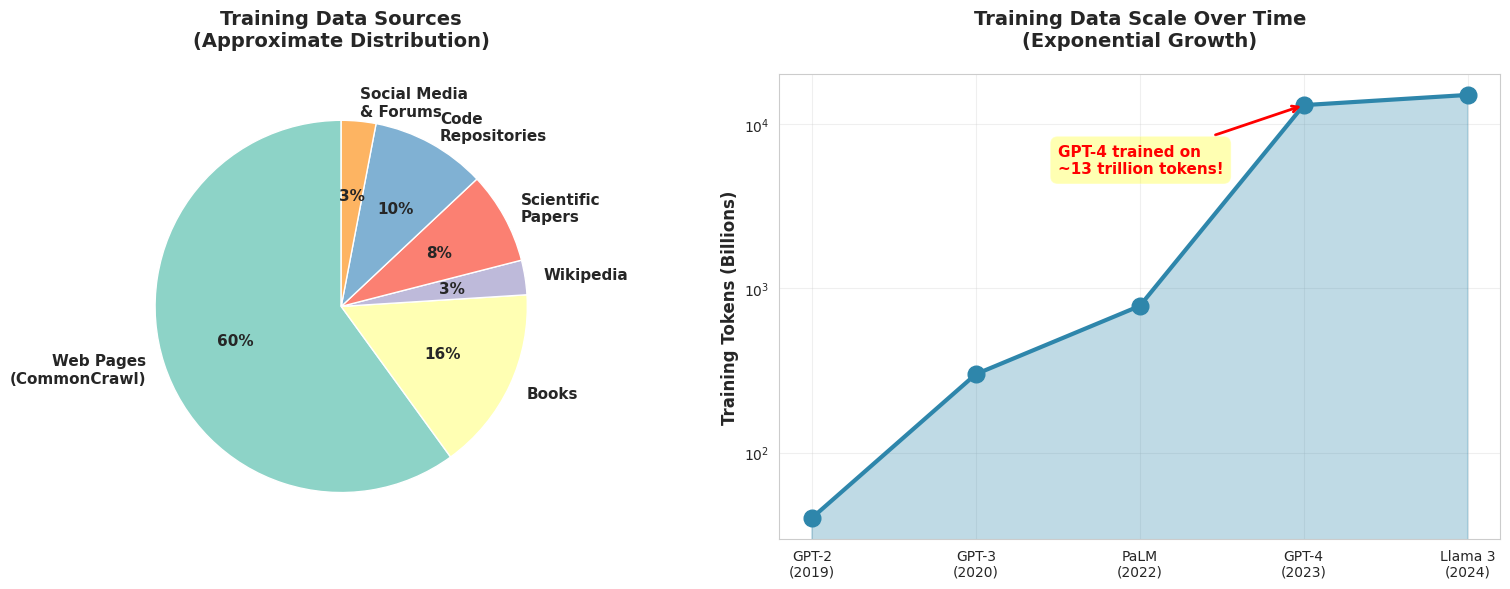


📊 Training Data Facts:
   - GPT-3: ~500 billion tokens (~1 million books equivalent)
   - GPT-4: ~13 trillion tokens (estimated)
   - Cost: $10M - $100M+ just for compute
   - Time: Months of training on thousands of GPUs

⚠️  Critical Insight:
   - Quality of training data = Quality of model behavior
   - Biases in data → Biases in model
   - Cutoff date means no knowledge of events after training


In [37]:
# Training data sources and scale
data_sources = {
    'Web Pages\n(CommonCrawl)': 60,
    'Books': 16,
    'Wikipedia': 3,
    'Scientific\nPapers': 8,
    'Code\nRepositories': 10,
    'Social Media\n& Forums': 3
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart of data sources
colors_pie = plt.cm.Set3(range(len(data_sources)))
wedges, texts, autotexts = ax1.pie(data_sources.values(), labels=data_sources.keys(), 
                                     autopct='%1.0f%%', startangle=90, colors=colors_pie,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Training Data Sources\n(Approximate Distribution)', fontsize=14, fontweight='bold', pad=20)

# Scale over time
models_timeline = ['GPT-2\n(2019)', 'GPT-3\n(2020)', 'PaLM\n(2022)', 'GPT-4\n(2023)', 'Llama 3\n(2024)']
tokens_trained = [40, 300, 780, 13000, 15000]  # Billions of tokens

ax2.plot(models_timeline, tokens_trained, marker='o', linewidth=3, markersize=12, color='#2E86AB')
ax2.fill_between(range(len(models_timeline)), tokens_trained, alpha=0.3, color='#2E86AB')
ax2.set_ylabel('Training Tokens (Billions)', fontsize=12, fontweight='bold')
ax2.set_title('Training Data Scale Over Time\n(Exponential Growth)', fontsize=14, fontweight='bold', pad=20)
ax2.grid(alpha=0.3)
ax2.set_yscale('log')

# Add annotations
ax2.annotate('GPT-4 trained on\n~13 trillion tokens!', 
             xy=(3, 13000), xytext=(1.5, 5000),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, color='red', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n📊 Training Data Facts:")
print("   - GPT-3: ~500 billion tokens (~1 million books equivalent)")
print("   - GPT-4: ~13 trillion tokens (estimated)")
print("   - Cost: $10M - $100M+ just for compute")
print("   - Time: Months of training on thousands of GPUs")
print("\n⚠️  Critical Insight:")
print("   - Quality of training data = Quality of model behavior")
print("   - Biases in data → Biases in model")
print("   - Cutoff date means no knowledge of events after training")